In [1]:
cd ../

/nfs/tynamo/home/data/vision7/stsutsui/public-repos/smallgan-pytorch-github


In [2]:
import glob
import os
import matplotlib
from PIL import Image
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torchvision
from models.setup_model import setup_model
from dataloaders.setup_dataloader_smallgan import setup_dataloader


def reconstruct(model,out_path,indices):
    model.eval()
    device = next(model.parameters()).device
    dataset_size = model.embeddings.weight.size()[0]
    assert type(indices)==torch.Tensor
    indices = indices.to(device)        
    embeddings = model.embeddings(indices)
    batch_size = embeddings.size()[0]
    image_tensors = model(embeddings)
    with torch.no_grad():
        torchvision.utils.save_image(
            image_tensors,
            out_path,
            nrow=int(batch_size ** 0.5),
            normalize=True,
        )
        
#see https://github.com/nogu-atsu/SmallGAN/blob/2293700dce1e2cd97e25148543532814659516bd/gen_models/ada_generator.py#L37-L53
def interpolate(model,out_path,source,dist,trncate=0.4,num=5):
    model.eval()
    device = next(model.parameters()).device
    dataset_size = model.embeddings.weight.size()[0]
    indices = torch.tensor([source,dist],device=device)
    indices = indices.to(device) 
    embeddings = model.embeddings(indices)
    embeddings = embeddings[[0]] * torch.linspace(1, 0, num,device=device)[:, None] + embeddings[[1]]* torch.linspace(0, 1, num,device=device)[:, None]
    batch_size = embeddings.size()[0]
    image_tensors = model(embeddings)
    with torch.no_grad():
        torchvision.utils.save_image(
            image_tensors,
            out_path,
            nrow=batch_size,
            normalize=True,
        )

#from https://github.com/nogu-atsu/SmallGAN/blob/2293700dce1e2cd97e25148543532814659516bd/gen_models/ada_generator.py#L37-L53        
def random(model,out_path,tmp=0.4, n=9, truncate=False):
    from scipy.stats import truncnorm
    model.eval()
    device = next(model.parameters()).device
    dataset_size = model.embeddings.weight.size()[0]
    dim_z = model.embeddings.weight.size(1)
    if truncate:
        embeddings = truncnorm(-tmp, tmp).rvs(n * dim_z).astype("float32").reshape(n, dim_z)
    else:
        embeddings = np.random.normal(0, tmp, size=(n, dim_z)).astype("float32")
    embeddings = torch.tensor(embeddings,device=device)
    batch_size = embeddings.size()[0]
    image_tensors = model(embeddings)
    with torch.no_grad():
        torchvision.utils.save_image(
            image_tensors,
            out_path,
            nrow=int(batch_size ** 0.5),
            normalize=True,
        )

In [3]:
dataloader = setup_dataloader("anime",batch_size=2)
dataset_size = len(dataloader.dataset)
exp_dir = "./experiments/trian_github_dataset-anime_model-biggan128-ada_2019-04-25-06-57-56/"
print(json.load(open(exp_dir+"args.json")))
model = setup_model("biggan128-ada",dataset_size=50,resume=exp_dir+"checkpoint_iter10000.pth.tar")
model = model.cuda()

{'batch': 25, 'dataset': 'anime', 'eval_freq': 500, 'githash': None, 'gpu': 'auto', 'iters': 10000, 'loss_dist_per': 'l2', 'loss_emd': 0.1, 'loss_norm_img': 1, 'loss_norm_per': 1, 'loss_per': 0.1, 'loss_re': 0.02, 'lr_bsa_l': 0.0005, 'lr_c_embed': 0.001, 'lr_embed': 0.05, 'lr_g_batch_stat': 0.0005, 'lr_g_l': 1e-07, 'model': 'biggan128-ada', 'print_freq': 100, 'resume': None, 'savedir': 'trian_github', 'saveroot': './experiments', 'step': 3000, 'step_facter': 0.1, 'workers': 4}
model name: biggan128-ada
Adding attention layer in G at resolution 64
resuming trained weights from ./experiments/trian_github_dataset-anime_model-biggan128-ada_2019-04-25-06-57-56/checkpoint_iter10000.pth.tar


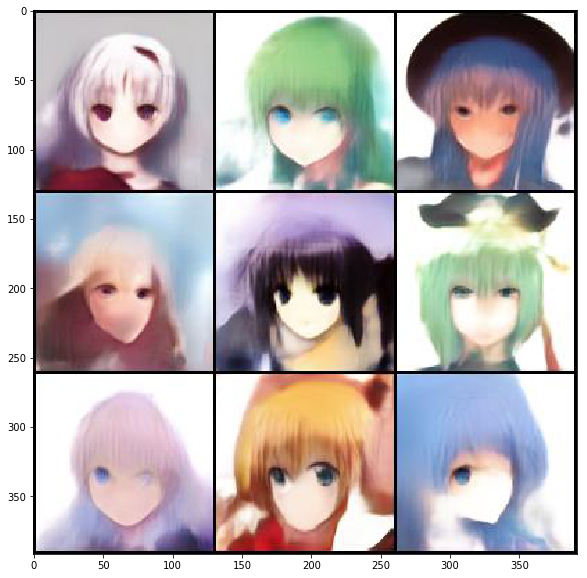

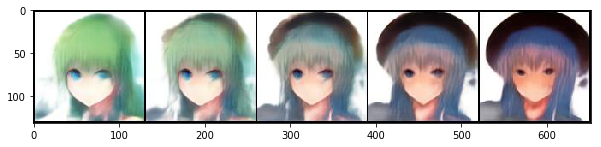

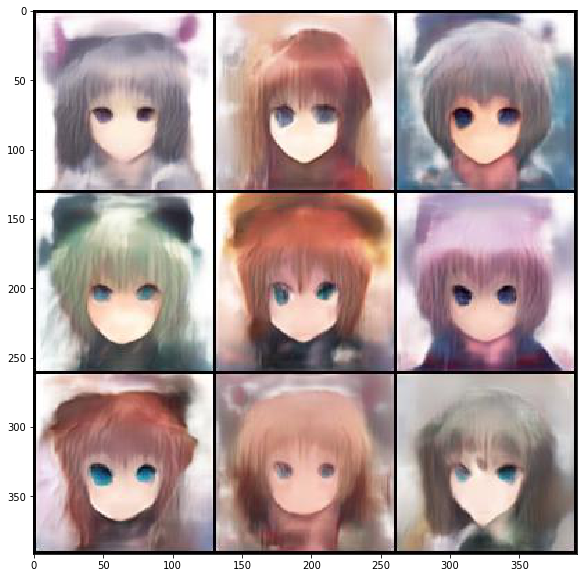

In [4]:
reconstruct(model,out_path="./samples/anime_reconstruct.jpg",indices= torch.arange(9))
interpolate(model,out_path="./samples/anime_interpolate.jpg",source=1,dist=2)
random(model,out_path="./samples/anime_random.jpg",tmp=0.2, n=9, truncate=True)

plt.figure(figsize=(10,10))
im = Image.open("./samples/anime_reconstruct.jpg")
plt.imshow(im)
plt.show()

plt.figure(figsize=(10,10))
im = Image.open("./samples/anime_interpolate.jpg")
plt.imshow(im)
plt.show()

plt.figure(figsize=(10,10))
im = Image.open("./samples/anime_random.jpg")
plt.imshow(im)
plt.show()

In [5]:
dataloader = setup_dataloader("face",batch_size=2)
dataset_size = len(dataloader.dataset)
exp_dir = "./experiments/train_dataset-face_model-biggan128-ada_2019-04-25-07-34-46/"
print(json.load(open(exp_dir+"args.json")))
model = setup_model("biggan128-ada",dataset_size=50,resume=exp_dir+"checkpoint_iter10000.pth.tar")
model = model.cuda()

{'batch': 25, 'dataset': 'face', 'eval_freq': 500, 'githash': None, 'gpu': 'auto', 'iters': 10000, 'loss_dist_per': 'l2', 'loss_emd': 0.1, 'loss_norm_img': 1, 'loss_norm_per': 1, 'loss_per': 0.1, 'loss_re': 0.02, 'lr_bsa_l': 0.001, 'lr_c_embed': 0.001, 'lr_embed': 0.05, 'lr_g_batch_stat': 0.001, 'lr_g_l': 1e-07, 'model': 'biggan128-ada', 'print_freq': 100, 'resume': None, 'savedir': 'train', 'saveroot': './experiments', 'step': 3000, 'step_facter': 0.1, 'workers': 4}
model name: biggan128-ada
Adding attention layer in G at resolution 64
resuming trained weights from ./experiments/train_dataset-face_model-biggan128-ada_2019-04-25-07-34-46/checkpoint_iter10000.pth.tar


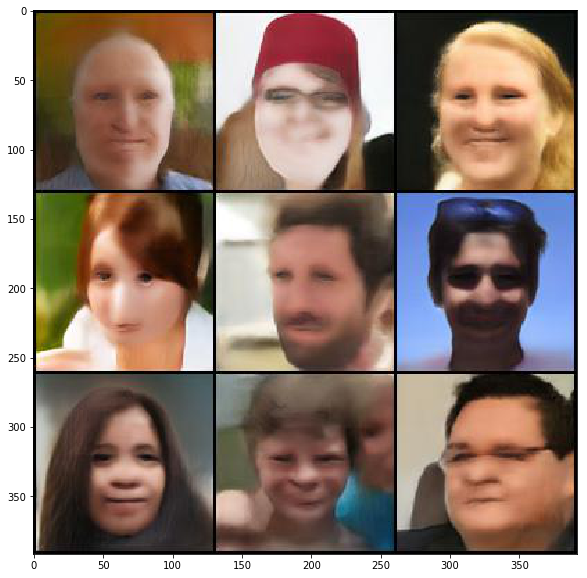

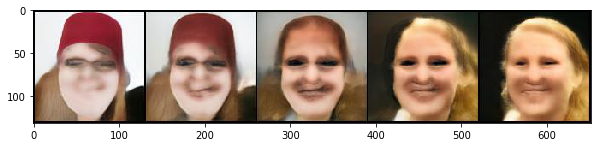

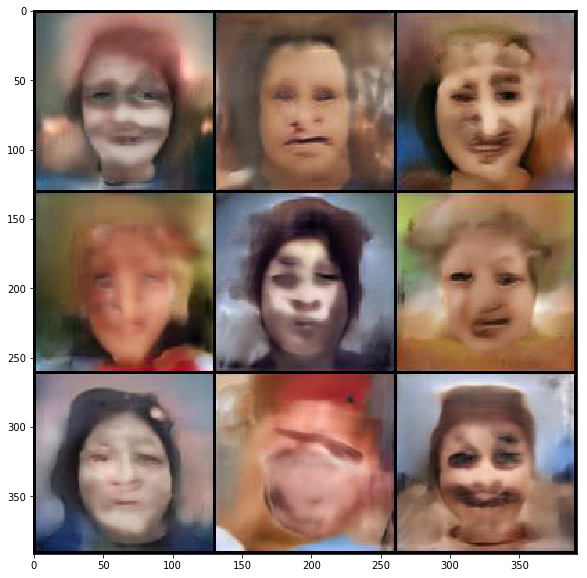

In [6]:
reconstruct(model,out_path="./samples/face_reconstruct.jpg",indices= torch.arange(9))
interpolate(model,out_path="./samples/face_interpolate.jpg",source=1,dist=2)
random(model,out_path="./samples/face_random.jpg",tmp=0.2, n=9, truncate=False)

plt.figure(figsize=(10,10))
im = Image.open("./samples/face_reconstruct.jpg")
plt.imshow(im)
plt.show()

plt.figure(figsize=(10,10))
im = Image.open("./samples/face_interpolate.jpg")
plt.imshow(im)
plt.show()

plt.figure(figsize=(10,10))
im = Image.open("./samples/face_random.jpg")
plt.imshow(im)
plt.show()